In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import os
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import pickle

**Load the dataset**

In [38]:
# load the data into the notebook
df = pd.read_csv('../data/train/The_Cancer_data_1500_V2.csv')

# print the first 5 rows of the dataframe
df.head(5)

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


**Display the data type**

In [39]:
# Check for the data types of each column
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
Age                   int64
Gender                int64
BMI                 float64
Smoking               int64
GeneticRisk           int64
PhysicalActivity    float64
AlcoholIntake       float64
CancerHistory         int64
Diagnosis             int64
dtype: object


**Summary of the Data**

Provide a summary of the dataset using df.info().

In [40]:
# get a summary of the data set
print("\nSummary of the dataset:")

print(df.info())


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB
None


**Handle Missing Values**

Check for missing values

In [41]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64


**Descriptive statistics**

Provide a summary of the dataset using df.describe().

In [42]:
# Descriptive statistics
print("\nDescriptive statistics for numerical columns:")
print(df.describe())


Descriptive statistics for numerical columns:
               Age       Gender          BMI      Smoking  GeneticRisk  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean     50.320000     0.490667    27.513321     0.269333     0.508667   
std      17.640968     0.500080     7.230012     0.443761     0.678895   
min      20.000000     0.000000    15.000291     0.000000     0.000000   
25%      35.000000     0.000000    21.483134     0.000000     0.000000   
50%      51.000000     0.000000    27.598494     0.000000     0.000000   
75%      66.000000     1.000000    33.850837     1.000000     1.000000   
max      80.000000     1.000000    39.958688     1.000000     2.000000   

       PhysicalActivity  AlcoholIntake  CancerHistory    Diagnosis  
count       1500.000000    1500.000000    1500.000000  1500.000000  
mean           4.897929       2.417987       0.144000     0.371333  
std            2.866162       1.419318       0.351207     0.483322  
min       

C:\Users\HP\AppData\Local\Temp\ipykernel_11876\1534813605.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= df["Diagnosis"], palette= cols)


<Axes: xlabel='Diagnosis', ylabel='count'>

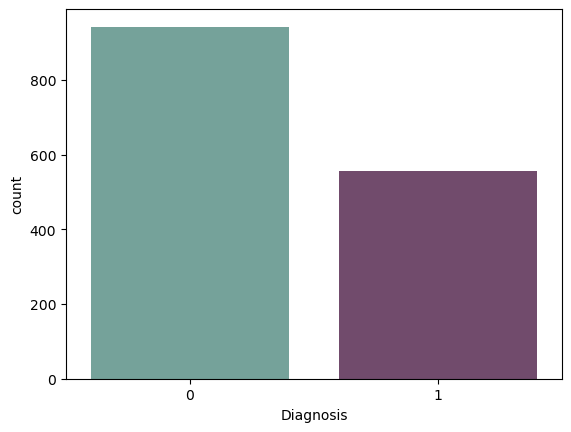

In [43]:
# Evaluation of the target and find out if our data is imbalanced or not
cols= ["#6daa9f","#774571"]
sns.countplot(x= df["Diagnosis"], palette= cols)

<function matplotlib.pyplot.show(close=None, block=None)>

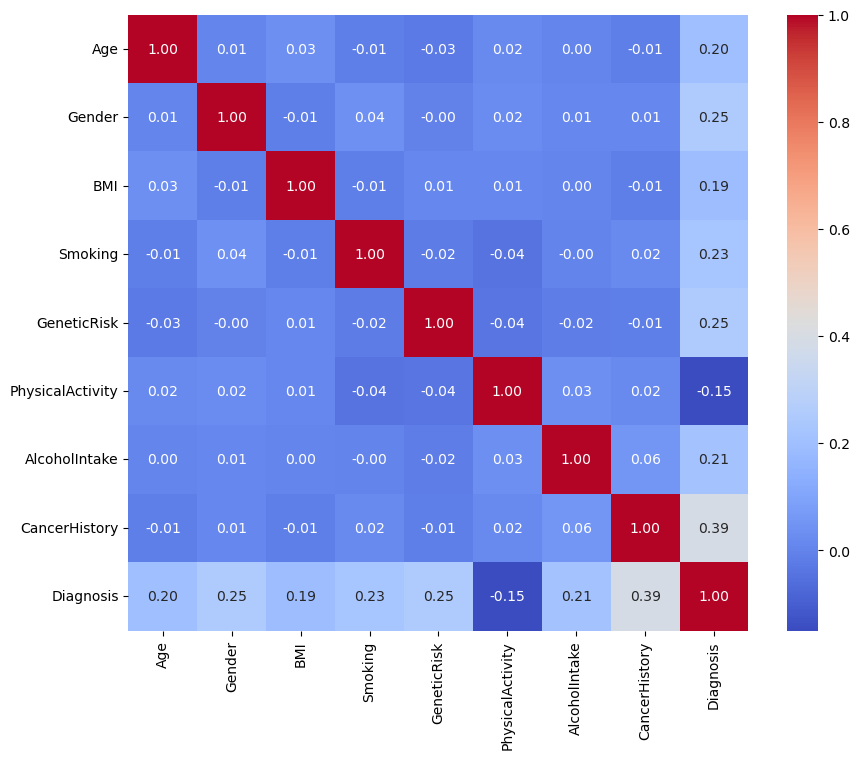

In [44]:
#Examaning a corelation matrix of all the features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show

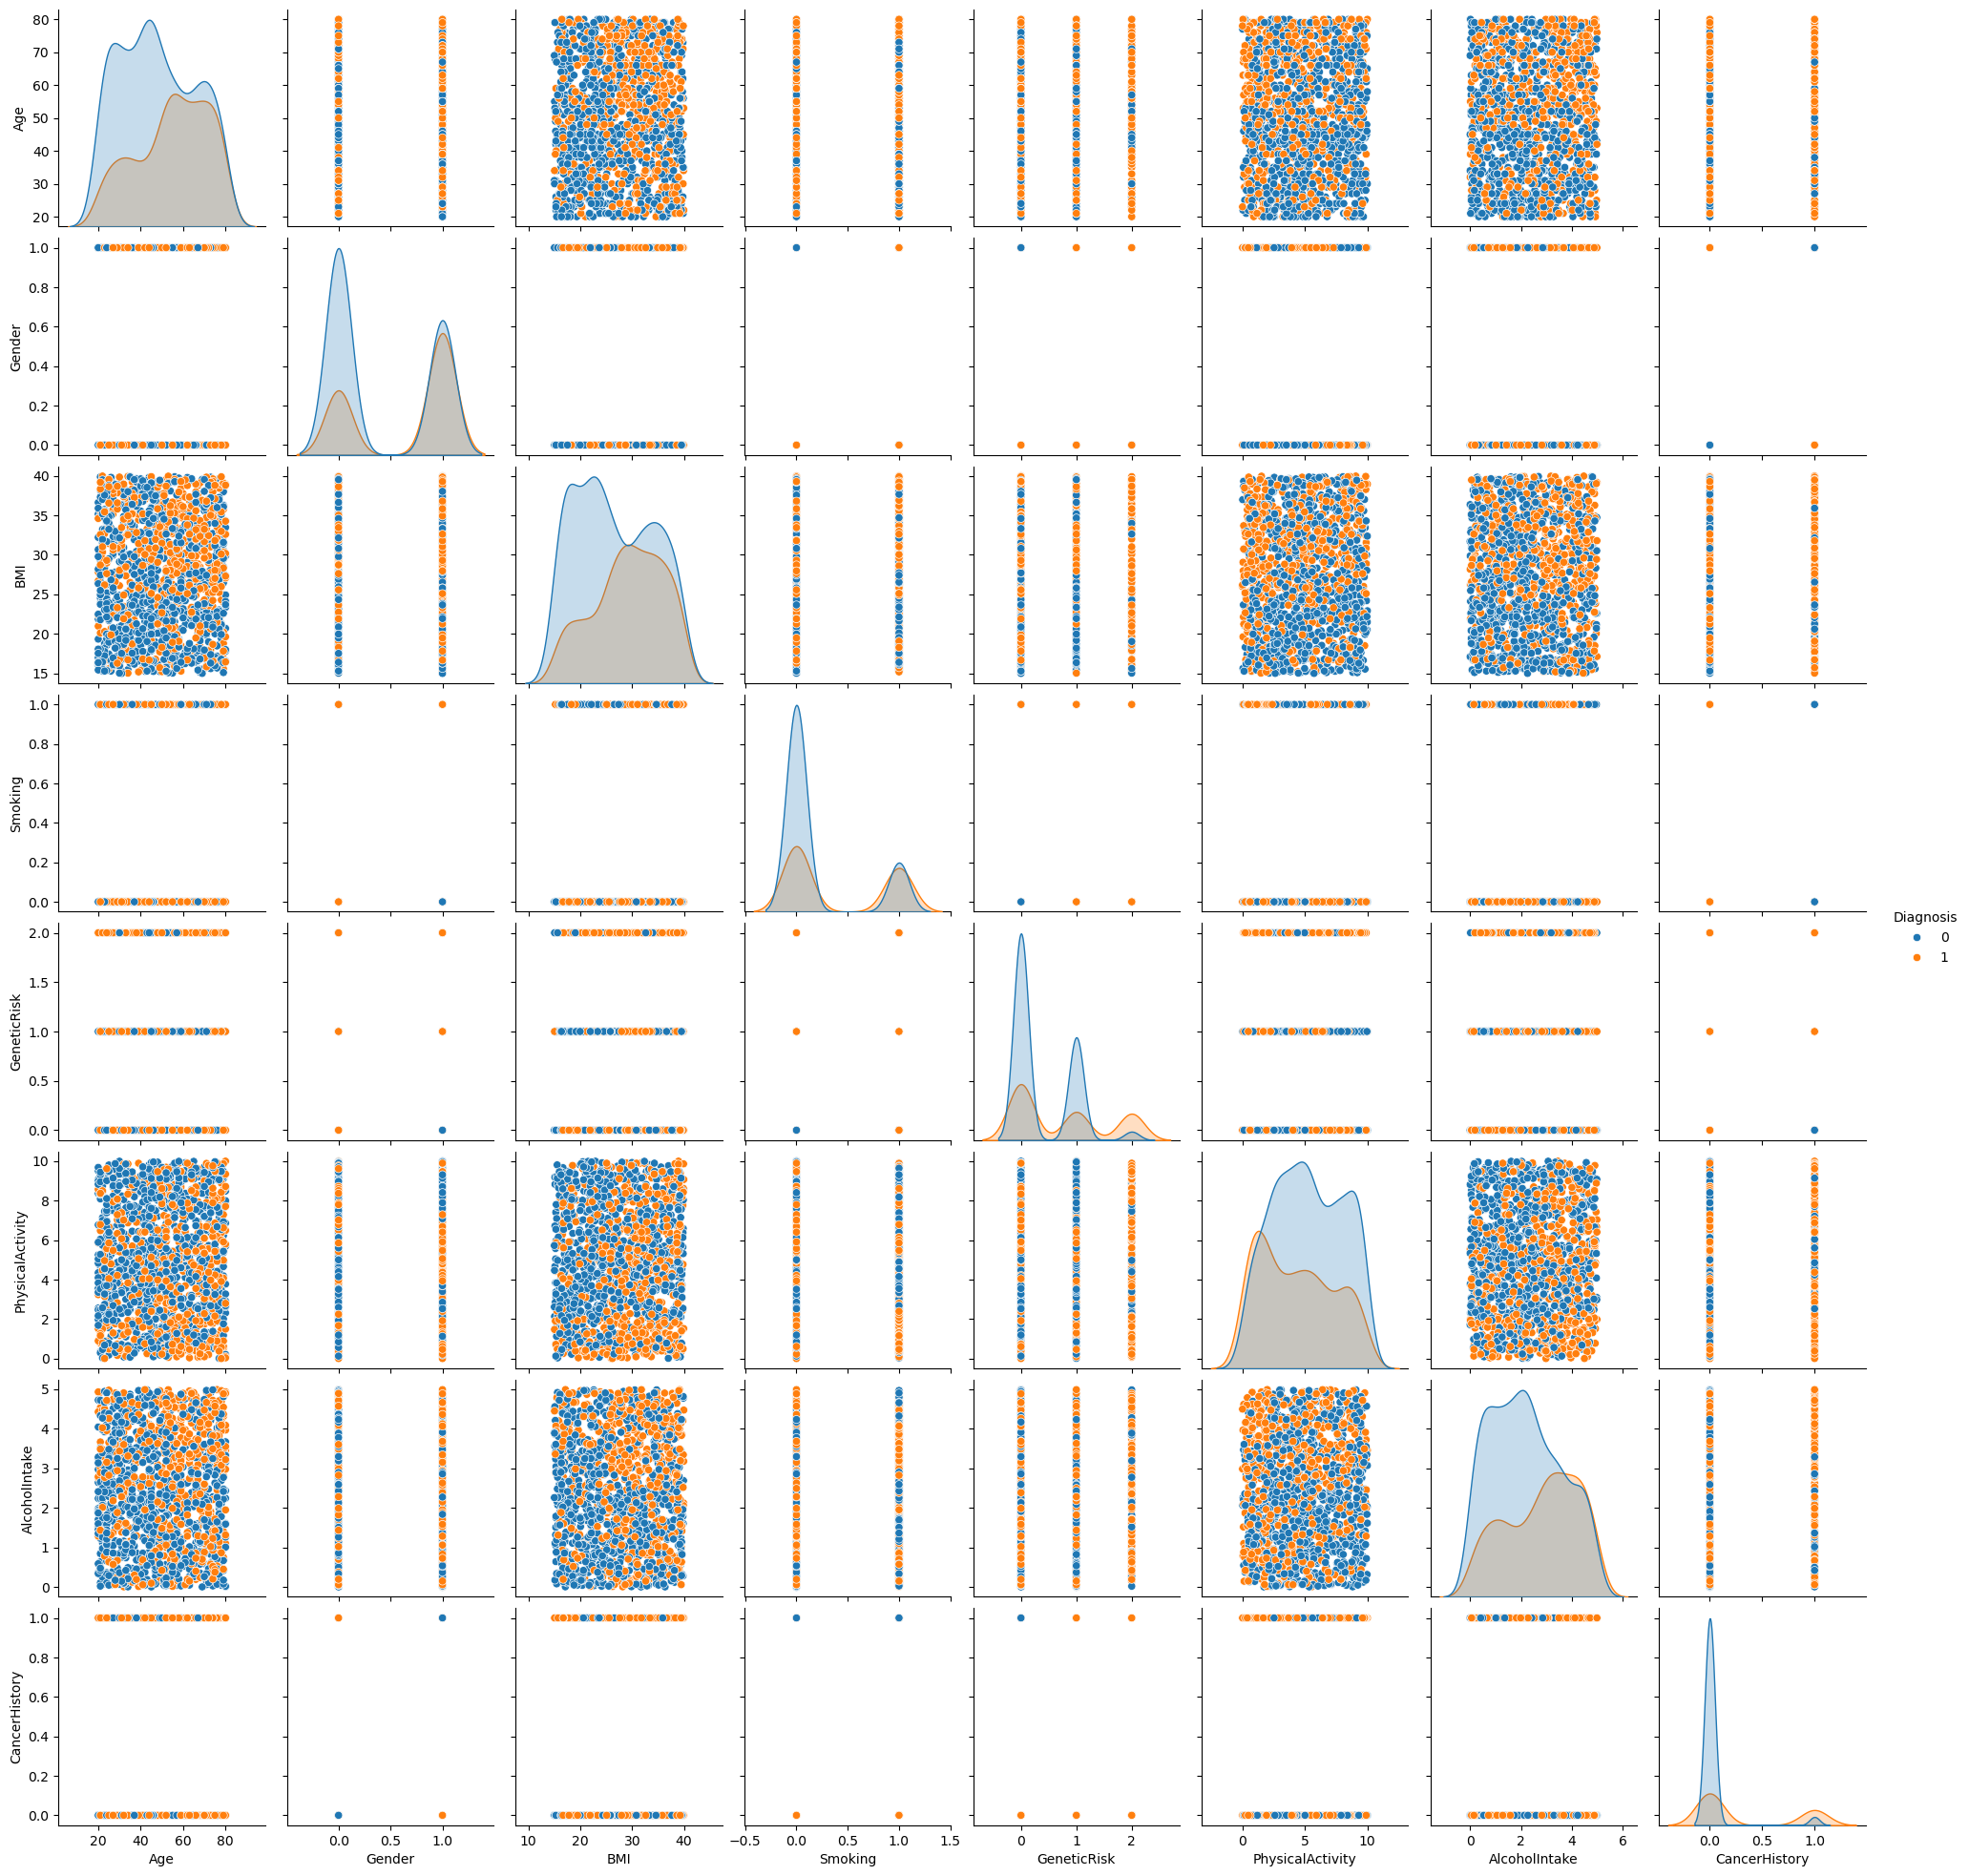

In [46]:
#General overview of the data distribution and outliers
sns.pairplot(df.iloc[:,:], hue = "Diagnosis");
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11876\3447574991.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=df["Diagnosis"], y=df[i], palette=cols)


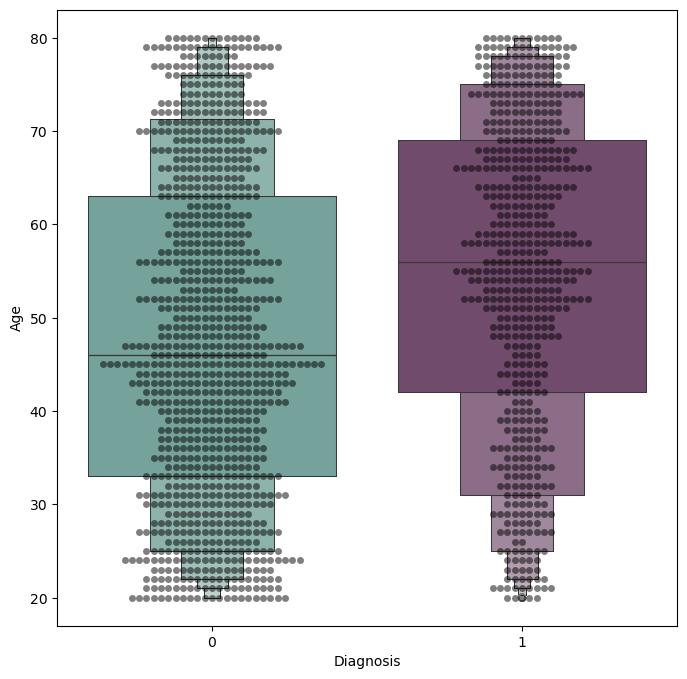

C:\Users\HP\AppData\Local\Temp\ipykernel_11876\3447574991.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=df["Diagnosis"], y=df[i], palette=cols)


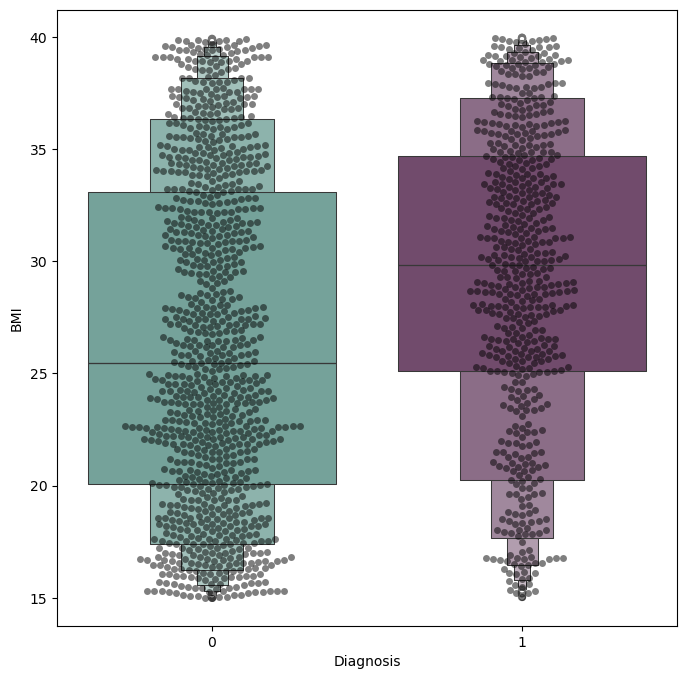

c:\Users\HP\anaconda3\envs\Summative\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 84.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\anaconda3\envs\Summative\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 67.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\AppData\Local\Temp\ipykernel_11876\3447574991.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=df["Diagnosis"], y=df[i], palette=cols)
c:\Users\HP\anaconda3\envs\Summative\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 89.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, 

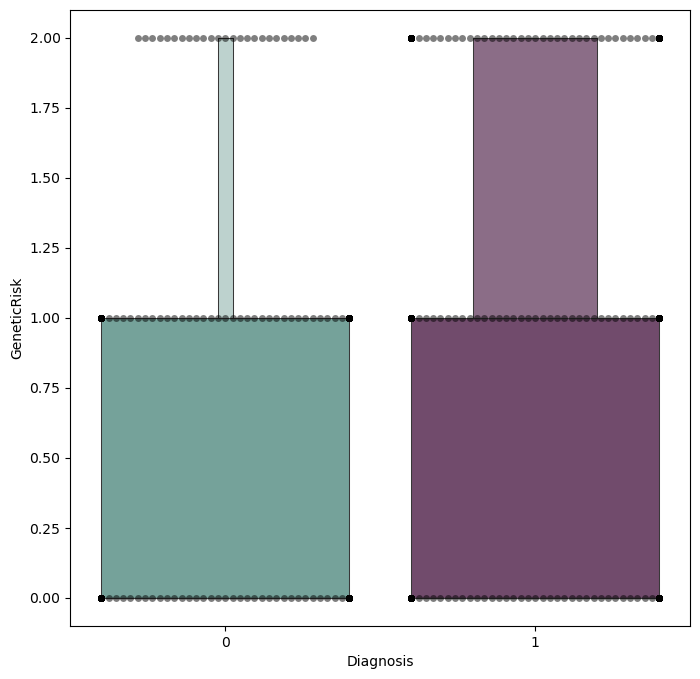

C:\Users\HP\AppData\Local\Temp\ipykernel_11876\3447574991.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=df["Diagnosis"], y=df[i], palette=cols)


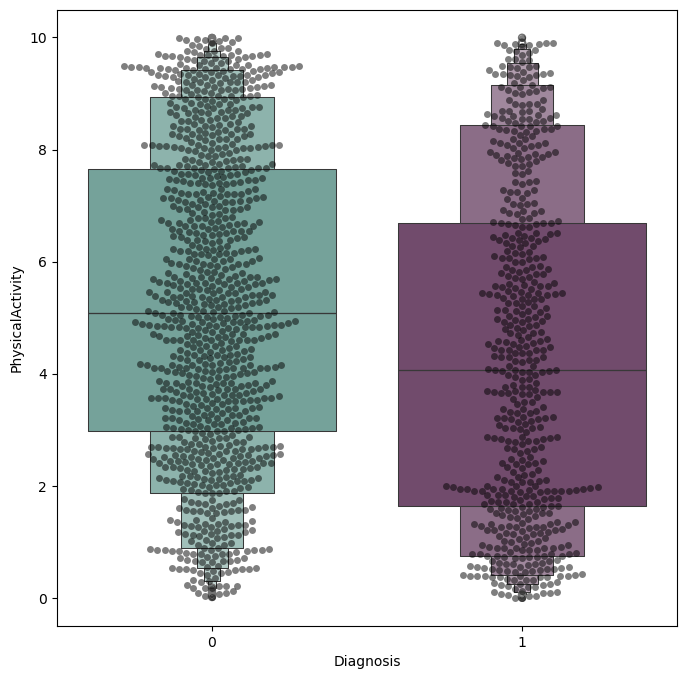

C:\Users\HP\AppData\Local\Temp\ipykernel_11876\3447574991.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=df["Diagnosis"], y=df[i], palette=cols)


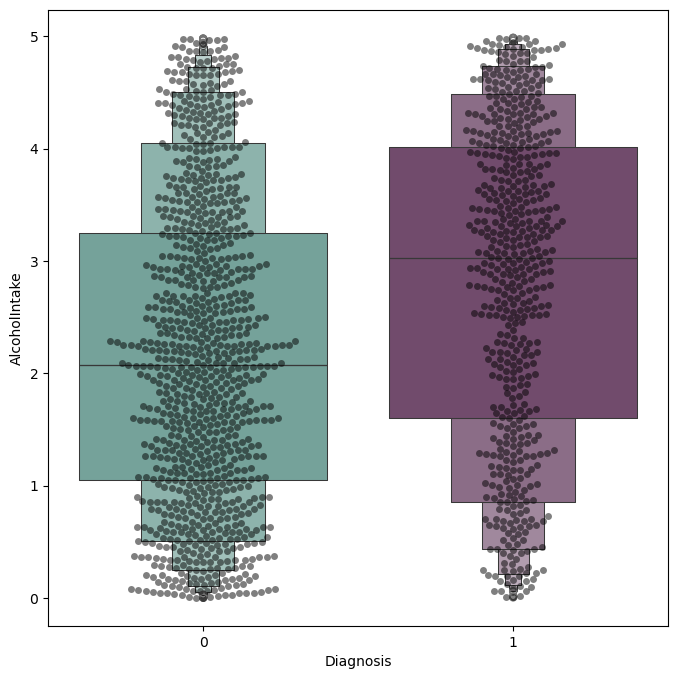

In [47]:
# Boxen and swarm plot of some non binary features.
feature = ["Age","BMI","GeneticRisk","PhysicalActivity","AlcoholIntake"]
for i in feature:
    plt.figure(figsize=(8,8))
    sns.swarmplot(x=df["Diagnosis"], y=df[i], color="black", alpha=0.5)
    sns.boxenplot(x=df["Diagnosis"], y=df[i], palette=cols)
    plt.show()



<Axes: xlabel='AlcoholIntake', ylabel='Age'>

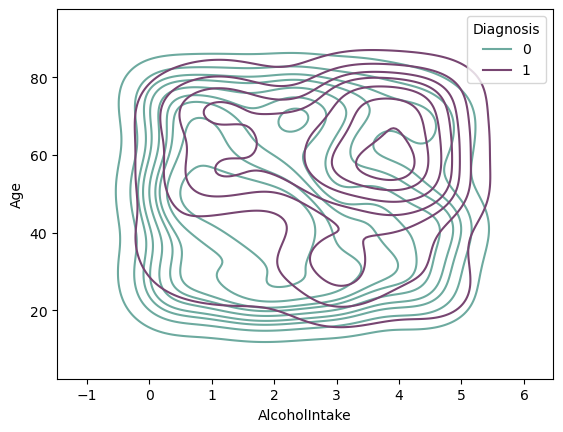

In [52]:
sns.kdeplot(x=df["AlcoholIntake"], y=df["Age"], hue =df["Diagnosis"], palette=cols)

**Feature Engineering and Data Splitting**

In [53]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (Y)
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']


In [54]:
y.shape

(1500,)

In [55]:
X.shape

(1500, 8)

In [56]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1500.0,-9.473903e-18,1.000334,-1.719300,-0.868723,0.038559,0.889137,1.683008
Gender,1500.0,2.368476e-17,1.000334,-0.981504,-0.981504,-0.981504,1.018844,1.018844
BMI,1500.0,-1.184238e-17,1.000334,-1.731284,-0.834328,0.011784,0.876849,1.721922
Smoking,1500.0,7.579123e-17,1.000334,-0.607135,-0.607135,-0.607135,1.647080,1.647080
GeneticRisk,1500.0,-8.230453e-17,1.000334,-0.749506,-0.749506,-0.749506,0.723966,2.197439
PhysicalActivity,1500.0,-1.065814e-16,1.000334,-1.708610,-0.859735,-0.022202,0.876714,1.778817
AlcoholIntake,1500.0,-1.042129e-16,1.000334,-1.703339,-0.850967,-0.024679,0.822949,1.810718
CancerHistory,1500.0,-2.131628e-17,1.000334,-0.410152,-0.410152,-0.410152,-0.410152,2.438123


In [57]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=7)

In [58]:
X_train

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory
513,-1.719300,1.018844,0.041403,1.647080,2.197439,-0.580301,-0.798111,-0.410152
1280,1.002547,1.018844,-0.248460,-0.607135,-0.749506,-1.049328,-0.324712,-0.410152
687,0.832431,1.018844,0.320607,-0.607135,-0.749506,0.256077,0.227030,-0.410152
734,0.038559,1.018844,-0.096988,-0.607135,-0.749506,0.046561,1.374210,-0.410152
125,-1.719300,-0.981504,1.056341,-0.607135,-0.749506,1.209849,0.155812,-0.410152
...,...,...,...,...,...,...,...,...
211,0.775726,-0.981504,0.164047,1.647080,2.197439,-0.957453,-1.011937,-0.410152
502,1.059252,1.018844,-0.146080,1.647080,-0.749506,-0.543375,-1.255548,-0.410152
537,1.172662,-0.981504,-0.009410,-0.607135,-0.749506,-0.277429,0.624205,-0.410152
1220,-0.755312,1.018844,0.000245,1.647080,-0.749506,-0.017221,-0.299674,-0.410152


**Model Building**

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=20, 
    restore_best_weights=True)

# Initialising the model
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1],))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.optimizers import SGD
# Compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size = 32, epochs = 500,callbacks=[early_stopping], validation_split=0.2)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")


Epoch 1/500
29/29 [==============================] - 1s 10ms/step - loss: 0.6918 - accuracy: 0.6222 - val_loss: 0.6906 - val_accuracy: 0.6000
Epoch 2/500
29/29 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.6222 - val_loss: 0.6865 - val_accuracy: 0.6000
Epoch 3/500
29/29 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.6222 - val_loss: 0.6718 - val_accuracy: 0.6000
Epoch 4/500
29/29 [==============================] - 0s 3ms/step - loss: 0.6443 - accuracy: 0.6222 - val_loss: 0.6228 - val_accuracy: 0.6000
Epoch 5/500
29/29 [==============================] - 0s 3ms/step - loss: 0.5776 - accuracy: 0.6222 - val_loss: 0.5493 - val_accuracy: 0.6000
Epoch 6/500
29/29 [==============================] - 0s 3ms/step - loss: 0.5209 - accuracy: 0.6222 - val_loss: 0.5134 - val_accuracy: 0.6000
Epoch 7/500
29/29 [==============================] - 0s 3ms/step - loss: 0.4971 - accuracy: 0.6222 - val_loss: 0.5051 - val_accuracy: 0.6000
Epoch 8/500


In [68]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 82.16%


In [71]:
# Save the model as an HDF5 file
model.save('../models/model.h5')

Final Training Accuracy: 87.67%
Final Validation Accuracy: 85.33%


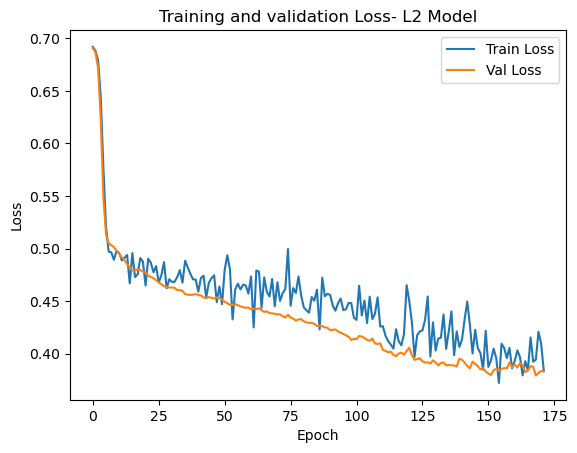

In [72]:
# Print the final training and validation accuracy in percentage
final_train_accuracy = history.history['accuracy'][-1] * 100
final_val_accuracy = history.history['val_accuracy'][-1] * 100
print(f"Final Training Accuracy: {final_train_accuracy:.2f}%")
print(f"Final Validation Accuracy: {final_val_accuracy:.2f}%")


# Plot Training and validation loss values
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Training and validation Loss- L2 Model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc="upper right")
plt.show()

12/12 [==============================] - 0s 906us/step
Test Accuracy: 0.8773333333333333
Confusion Matrix:
[[223  25]
 [ 21 106]]
Classification Report:
              precision    recall  f1-score   support

   No Cancer       0.91      0.90      0.91       248
      Cancer       0.81      0.83      0.82       127

    accuracy                           0.88       375
   macro avg       0.86      0.87      0.86       375
weighted avg       0.88      0.88      0.88       375



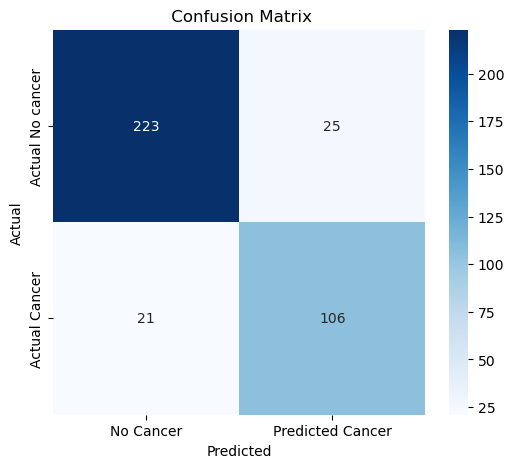

Sample 1:
Actual: 0 - Predicted: [1] (Probability: 0.6586)
--------------------------------------------------
Sample 2:
Actual: 1 - Predicted: [1] (Probability: 0.7169)
--------------------------------------------------
Sample 3:
Actual: 1 - Predicted: [1] (Probability: 0.7169)
--------------------------------------------------
Sample 4:
Actual: 0 - Predicted: [1] (Probability: 0.7169)
--------------------------------------------------
Sample 5:
Actual: 1 - Predicted: [1] (Probability: 0.7152)
--------------------------------------------------
Sample 6:
Actual: 0 - Predicted: [0] (Probability: 0.2683)
--------------------------------------------------
Sample 7:
Actual: 0 - Predicted: [0] (Probability: 0.0011)
--------------------------------------------------
Sample 8:
Actual: 0 - Predicted: [0] (Probability: 0.1404)
--------------------------------------------------
Sample 9:
Actual: 1 - Predicted: [1] (Probability: 0.7169)
--------------------------------------------------
Sample 10:

In [75]:
import numpy as np
from keras.models import load_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Function to predict with the model
def make_predictions(model, X_test, y_test):
    model = load_model("../models/model.h5")
    # Predict probabilities on the test data
    y_pred_probabilities = model.predict(X_test)

    # Convert probabilities to binary class predictions (0 or 1)
    y_pred_classes = (y_pred_probabilities > 0.5).astype(int)

    return y_pred_classes, y_pred_probabilities

# Function to evaluate model performance
def evaluate_model(y_test, y_pred_classes):

    accuracy = accuracy_score(y_test, y_pred_classes)
    print(f"Test Accuracy: {accuracy}")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_classes)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Classification report
    class_report = classification_report(y_test, y_pred_classes, target_names=['No Cancer', 'Cancer'])
    print("Classification Report:")
    print(class_report)

    # Visualize the confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Cancer', 'Predicted Cancer'],
            yticklabels=['Actual No cancer', 'Actual Cancer'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(' Confusion Matrix')
    plt.show()

# Function to print some sample predictions
def print_sample_predictions(y_test, y_pred_classes, y_pred_probabilities, num_samples=10):

    for i in range(num_samples):
        print(f"Sample {i+1}:")
        print(f"Actual: {y_test.iloc[i]} - Predicted: {y_pred_classes[i]} (Probability: {y_pred_probabilities[i][0]:.4f})")
        print("-" * 50)


# Make predictions
y_pred_classes, y_pred_probabilities = make_predictions(model, X_test, y_test)

# Evaluate model performance
evaluate_model(y_test, y_pred_classes)

# Print some sample predictions
print_sample_predictions(y_test, y_pred_classes, y_pred_probabilities)